## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-10 18:13:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   105MB/s    in 0.8s    

2022-10-10 18:13:01 (105 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('Cruzipain_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,active
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactive
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactive
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,active
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,10000.0,inactive
...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,7300.0,intermediate
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,13500.0,inactive
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,2500.0,intermediate
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,52000.0,inactive


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,active
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactive
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactive
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,active
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,10000.0,inactive
...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,7300.0,intermediate
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,13500.0,inactive
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,2500.0,intermediate
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,52000.0,inactive


In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [8]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [9]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL90512,50.0,active,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1
1,CHEMBL327902,10000.0,inactive,C/C(=N\NC(N)=O)c1cccc(Cl)c1
2,CHEMBL88307,10000.0,inactive,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1
3,CHEMBL90475,1000.0,active,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1
4,CHEMBL90371,10000.0,inactive,CCC(N/N=C(/N)S)c1cccc(Br)c1
...,...,...,...,...
599,CHEMBL4865594,7300.0,intermediate,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12
600,CHEMBL4848906,13500.0,inactive,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...
601,CHEMBL4855177,2500.0,intermediate,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1
602,CHEMBL598279,52000.0,inactive,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [10]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [11]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [12]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,262.165,2.9619,2.0,2.0
1,211.652,1.7323,2.0,2.0
2,300.225,3.0684,2.0,2.0
3,394.725,4.9093,1.0,2.0
4,288.214,2.6493,3.0,2.0
...,...,...,...,...
599,328.803,3.8211,3.0,5.0
600,462.554,2.5899,2.0,8.0
601,383.883,3.7709,2.0,6.0
602,356.429,4.9941,2.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [13]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,262.165,2.9619,2.0,2.0
1,211.652,1.7323,2.0,2.0
2,300.225,3.0684,2.0,2.0
3,394.725,4.9093,1.0,2.0
4,288.214,2.6493,3.0,2.0
...,...,...,...,...
599,328.803,3.8211,3.0,5.0
600,462.554,2.5899,2.0,8.0
601,383.883,3.7709,2.0,6.0
602,356.429,4.9941,2.0,5.0


In [14]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,active
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactive
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactive
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,active
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,10000.0,inactive
...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,7300.0,intermediate
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,13500.0,inactive
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,2500.0,intermediate
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,52000.0,inactive


Now, let's combine the 2 DataFrame

In [15]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [16]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,active,262.165,2.9619,2.0,2.0
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactive,211.652,1.7323,2.0,2.0
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactive,300.225,3.0684,2.0,2.0
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,active,394.725,4.9093,1.0,2.0
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,10000.0,inactive,288.214,2.6493,3.0,2.0
...,...,...,...,...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,7300.0,intermediate,328.803,3.8211,3.0,5.0
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,13500.0,inactive,462.554,2.5899,2.0,8.0
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,2500.0,intermediate,383.883,3.7709,2.0,6.0
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,52000.0,inactive,356.429,4.9941,2.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [17]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [18]:
df_combined.standard_value.describe()

count    6.040000e+02
mean     1.616088e+13
std      2.298154e+14
min      1.000000e-01
25%      6.000000e+02
50%      1.000000e+04
75%      3.300000e+04
max      5.011872e+15
Name: standard_value, dtype: float64

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [20]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,active,262.165,2.9619,2.0,2.0,50.0
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,inactive,211.652,1.7323,2.0,2.0,10000.0
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,inactive,300.225,3.0684,2.0,2.0,10000.0
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,active,394.725,4.9093,1.0,2.0,1000.0
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,inactive,288.214,2.6493,3.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,intermediate,328.803,3.8211,3.0,5.0,7300.0
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,inactive,462.554,2.5899,2.0,8.0,13500.0
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,intermediate,383.883,3.7709,2.0,6.0,2500.0
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,inactive,356.429,4.9941,2.0,5.0,52000.0


In [21]:
df_norm.standard_value_norm.describe()

count    6.040000e+02
mean     2.698716e+06
std      1.606914e+07
min      1.000000e-01
25%      6.000000e+02
50%      1.000000e+04
75%      3.300000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [22]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,active,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,inactive,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,inactive,300.225,3.0684,2.0,2.0,5.000000
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,active,394.725,4.9093,1.0,2.0,6.000000
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,inactive,288.214,2.6493,3.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
599,CHEMBL4865594,OCCCNc1nc(Nc2ccc(Cl)cc2)nc2ccccc12,intermediate,328.803,3.8211,3.0,5.0,5.136677
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,inactive,462.554,2.5899,2.0,8.0,4.869666
601,CHEMBL4855177,Clc1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1,intermediate,383.883,3.7709,2.0,6.0,5.602060
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,inactive,356.429,4.9941,2.0,5.0,4.283997


In [23]:
df_final.pIC50.describe()

count    604.000000
mean       5.365777
std        1.534827
min        1.000000
25%        4.481486
50%        5.000000
75%        6.221849
max       10.000000
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [24]:
df_final.to_csv('Cruzipain_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL90512,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,active,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL327902,C/C(=N\NC(N)=O)c1cccc(Cl)c1,inactive,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL88307,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,inactive,300.225,3.0684,2.0,2.0,5.000000
3,CHEMBL90475,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,active,394.725,4.9093,1.0,2.0,6.000000
4,CHEMBL90371,CCC(N/N=C(/N)S)c1cccc(Br)c1,inactive,288.214,2.6493,3.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
597,CHEMBL4854591,OCCCNc1nc(Nc2cccc(F)c2)c2ccccc2n1,inactive,312.348,3.3068,3.0,5.0,4.602060
598,CHEMBL4849162,O=C(c1ccc(Nc2nc(NCCCO)c3ccccc3n2)cc1)N1CCOCC1,inactive,407.474,2.6401,3.0,7.0,4.823909
600,CHEMBL4848906,O=C(c1ccc(Nc2nc(NCCN3CCOCC3)c3ccccc3n2)cc1)N1C...,inactive,462.554,2.5899,2.0,8.0,4.869666
602,CHEMBL598279,COc1ccc(Nc2nc(NCc3ccccc3)c3ccccc3n2)cc1,inactive,356.429,4.9941,2.0,5.0,4.283997


Let's write this to CSV file.

In [26]:
df_2class.to_csv('Cruzipain_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

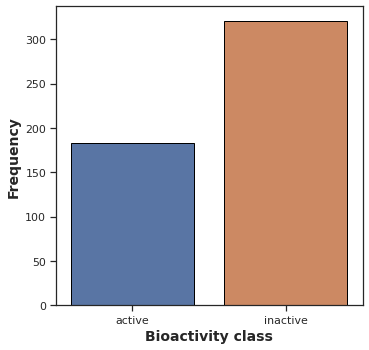

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

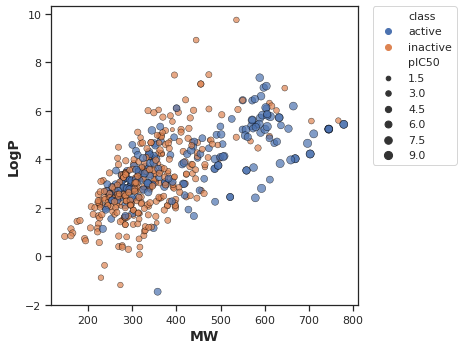

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

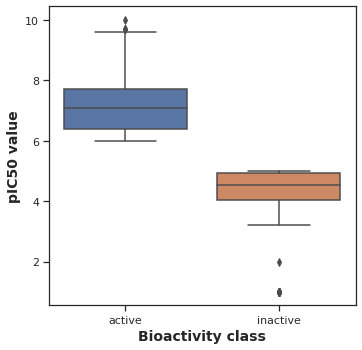

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [40]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(10)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [41]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,58743.0,4.359124e-78,0.05,Different distribution (reject H0)


#### **MW**

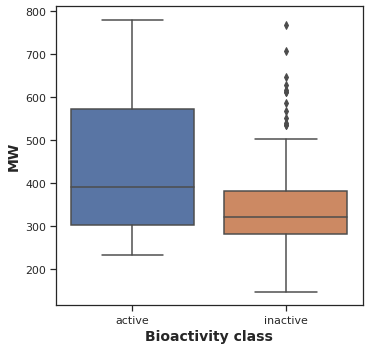

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [43]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,40083.5,9.579964e-12,0.05,Different distribution (reject H0)


#### **LogP**

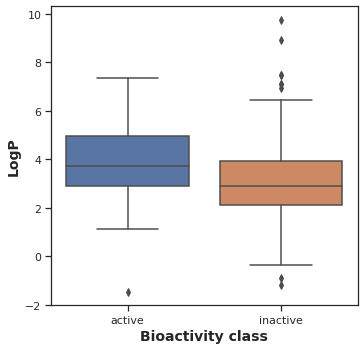

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,38916.5,1.275568e-09,0.05,Different distribution (reject H0)


#### **NumHDonors**

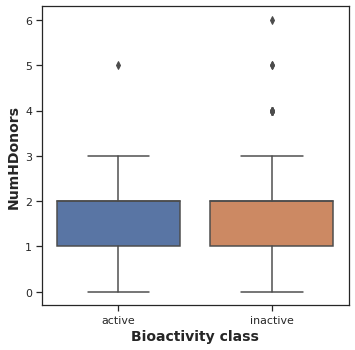

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [47]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,31770.5,0.099521,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

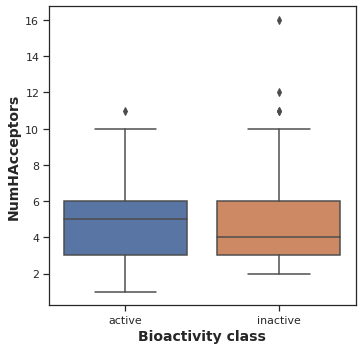

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,34552.5,0.000853,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

3 of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.